# Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [4]:
import seaborn as sns        # Seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go  # interactive charts
import plotly.express as px
import statistics as stats # calculate mode, mean and median

# Preprocessing 

## Prediction Page

### Scrape Data

#### First Trial

In [3]:
# http://data.10jqka.com.cn/financial/yjyg/
import requests

url_01 = 'http://data.10jqka.com.cn/financial/yjyg/'

result_01 = requests.get(url_01)
result_01 # success

<Response [403]>

In [104]:
result_01.text

''

#### Second Trial

In [110]:
# Request URL: http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/ajax/1/free/1/

url_02 = 'http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/ajax/1/free/1/'

result_02 = requests.get(url_02)
result_02 # success

<Response [200]>

In [111]:
result_02.text

''

#### Third Trail - Headers

In [1]:
# taking from Inspect-Network-Headers-Request Headers

headers = {

'Accept': 'text/html, */*; q=0.01',
'Accept-Encoding': 'gzip, deflate',
'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,ca;q=0.6',
#'Connection': 'keep-alive',
#'Cookie': 'Hm_lvt_60bad21af9c824a4a0530d5dbf4357ca=1619015030; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1619015030; Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1619015031; Hm_lpvt_60bad21af9c824a4a0530d5dbf4357ca=1619353365; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1619353365; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1619353365; v=A7rr0gtNjrC9-QJcq-BX9RSjDevfaz5FsO-y6cSzZs0Yt1adrPuOVYB_AvuX',
#'DNT': 1
'hexin-v': 'A55gYoy7ck_wOqYrr-ajbnrM6T_jX2LZ9CMWvUgnCuHcazIpsO-y6cSzZs8b',
#'Host': 'data.10jqka.com.cn'
'Referer': 'http://data.10jqka.com.cn/financial/yjyg/',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest'
    
}


<b>问题：https://realpython.com/python-requests/</b>
<ul>
<li>json的应用写法，可以直接得到字典类结果，这个课里会讲解吗？</li>
<li>result.json() 出现了错误：Expecting value: line 1 column 6 (char 5)，不是很理解</li>
<li>试了好多次，最多只获取到了200行，有什么原因吗？</li>
<li>尝试websraper，没有得到完整的数据，只有部分。显示了图片中的错误，是不是说明我的ip被封了？ </li>
    </ul>

#### Forth Trail - Webscraper 
https://www.webscraper.io/web-scraper-first-time-install 

In [185]:
# insert images
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#image = mpimg.imread("error.png")
#plt.imshow(image)
#plt.show()

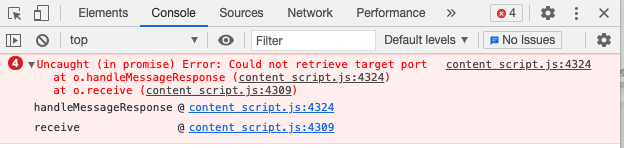

In [183]:
df_webscraper=pd.read_csv(r'/Users/k_k22/Downloads/Data Analysis/Tencent_course/第四周_周老师_正则表达式/webscraper_test.csv',index_col=None)

In [184]:
df_webscraper.head()

,web-scraper-order,web-scraper-start-url,index,name,performance,debrief
0,1619375682-296,http://data.10jqka.com.cn/financial/yjyg/,NaN,迈信林,NaN,NaN
1,1619375682-316,http://data.10jqka.com.cn/financial/yjyg/,NaN,NaN,业绩大幅上升,NaN
2,1619375682-237,http://data.10jqka.com.cn/financial/yjyg/,600105,NaN,NaN,NaN
3,1619375682-378,http://data.10jqka.com.cn/financial/yjyg/,NaN,NaN,NaN,"净利润18500万元至21500万元,增长幅度为154.27%至195.50%"
4,1619375682-363,http://data.10jqka.com.cn/financial/yjyg/,NaN,NaN,NaN,"净利润750万元至910万元,增长幅度为7.10%至30.00%"


#### Fifth Trail - BeautifulSoup

In [187]:
from bs4 import BeautifulSoup

<b>问题: https://www.crummy.com/software/BeautifulSoup/bs4/doc.zh/</b>
<ul>
<li>bs现在还实用吗？如果实用的话，可以稍微讲解一下吗？</li>
    </ul>

In [83]:
# BeautifulSoup function
#soup = BeautifulSoup(result,'html.parser')
#print(soup.prettify())

In [84]:
#soup.table

In [65]:
#stock = soup.find(class_='')
#stock_code = stock.find_all('stock_code') 
#print(stock_code)


#### Extract 10 pages

In [99]:
import json

In [4]:
# Extract more pages

result_true = ' ' #unsupported operand type(s) for +=: 'Response' and 'str'

url_true = 'http://data.10jqka.com.cn/ajax/yjyg/date/2021-03-31/board/ALL/field/enddate/order/desc/page/{}/ajax/1/free/1/'

for i in range(1,11): #extract page 1-10
    result_true += requests.get(url_true.format(i),headers=headers).text

In [173]:
result_true

'      <div class="page-loading" style="display: none;">\n        <div class="mask"></div>\n        <div class="loading-img"></div>\n    </div>\n     <table class="m-table J-ajax-table J-canvas-table">\n        <thead>\n        <tr class="row2">\n            <th width="40" >序号</th>\n            <th width="78" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'stockcode\'  colidx="1"><a href="javascript:void(0);" class="J-ajax-a" field="STOCKCODE">股票代码</a><i class="arr-down"></i></th>\n            <th width="78" >股票简称</th>\n            <th width="115" ><a href=\'javascript:void(0);\' class="J-ajax-a" field=\'summ\' ><a href="javascript:void(0);" class="J-ajax-a">业绩预告类型</a><i class="arr-down"></i></th>\n            <th width="350">业绩预告摘要</th>\n            <th width="97" ><a href="javascript:void(0);" class="J-ajax-a" field=\'jlrbl\' >净利润变动幅度<br/>(%)</a><i class="arr-down"></i></th>\n            <th width="135" ><a href="javascript:void(0);" class="J-ajax-a" field=\'SNTQJLR\' >上年同期

### Load dataframe

#### Build Dataframe

In [36]:
import re

In [5]:
# scrape each variable from webpage
index = re.findall('<td>(.*)</td>',result_true)
stockCode = re.findall('class="stockCode">(.*)</a>',result_true)
stockName = re.findall('class="J_showCanvas">(.*)</a>',result_true)
performance = re.findall('<span>(.*)</span>',result_true)
summary = re.findall('target="_blank">(.*)</a>',result_true)

# build up dataframe
df_05 = pd.DataFrame({
    'stockCode':stockCode,
    'stockName':stockName,
    'performance':performance,
    'summary':summary
},index=index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
df_05.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   stockCode    150 non-null    object
 1   stockName    150 non-null    object
 2   performance  150 non-null    object
 3   summary      150 non-null    object
dtypes: object(4)
memory usage: 5.9+ KB


#### Save Original File

In [122]:
df.to_csv('scrap_data_original.csv')

In [7]:
df_200=pd.read_csv(r'/Users/k_k22/Downloads/Data Analysis/Tencent_course/第四周_周老师_正则表达式/scrap_data_original.csv',index_col=None)

<IPython.core.display.Javascript object>

In [8]:
df_200.pop('Unnamed: 0')

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [9]:
df_200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   stockCode    200 non-null    int64 
 1   stockName    200 non-null    object
 2   performance  200 non-null    object
 3   summary      200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [10]:
df_200.head()

,stockCode,stockName,performance,summary
0,688076,诺泰生物,业绩大幅上升,净利润3015.35万元至3297.30万元
1,688314,康拓医疗,业绩预增,"净利润750万元至910万元,增长幅度为7.10%至30.00%"
2,605222,起帆电缆,业绩大幅上升,"净利润14213.23万元左右,增长幅度为132.35%左右"
3,2581,未名医药,预计扭亏,净利润2027.00万元至3040.00万元
4,300979,华利集团,业绩大幅上升,"净利润53000万元至61000万元,增长幅度为30.70%至50.43%"


#### Good stocks vs Bad stocks

In [11]:
df_200['performance'].value_counts()

业绩大幅上升    73
预计扭亏      60
预计减亏      28
预计增亏      14
业绩大幅下降     8
预计续亏       7
业绩预增       6
业绩预亏       3
业绩预降       1
Name: performance, dtype: int64

In [12]:
# define good stocks from performance
def performStats(perform):
    if '上升'in perform :
        return '盈利'
    elif '预增'in perform :
        return '盈利'
    elif '扭亏'in perform:
        return '盈利'
    elif '减亏'in perform:
        return '盈利'
    else:
        return '亏损'

In [13]:
df_200['performStatus'] = df_200['performance'].apply (lambda x:performStats(x))

In [14]:
df_200['performStatus'].value_counts()

盈利    167
亏损     33
Name: performStatus, dtype: int64

#### Split netProfit & growthRate

In [15]:
df_200['summary'].value_counts()

净利润6500万元左右                                2
净利润1000万元至1300万元                           2
净利润35000万元至41000万元,增长幅度为505.31%至609.08%    1
净利润-8800万元至-7000万元,下降幅度为64.2%至30.62%       1
净利润520000万元至580000万元,增长幅度为137%至164%        1
                                          ..
净利润6800万元至8800万元,增长幅度为369.55%至507.66%      1
净利润4800万元至5500万元                           1
净利润-610万元至-470万元                           1
净利润450.0万元至550.0万元                         1
净利润1800万元至2500万元,下降幅度为78.32%至69.9%         1
Name: summary, Length: 198, dtype: int64

In [16]:
#df_200['summary'].str.extract("(.*?),") - take everything before ','

In [17]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
df_split = df_200['summary'].str.split(",", n = 1, expand = True)

In [18]:
# split netProfit and growthRate
df_200['netProfit'] = df_split[0]
df_200['growthRate'] = df_split[1]

In [155]:
df_new = df_200[['stockCode','stockName','performStatus','netProfit','growthRate']].copy()

In [156]:
df_new['minProfit'] = df_new['netProfit'].str.extract('净利润(.*)万元至')
df_new['maxProfit'] = df_new['netProfit'].str.extract('至(.*)万元')
df_new['minRate'] = df_new['growthRate'].str.extract('幅度为(.*)%至')
df_new['maxRate'] = df_new['growthRate'].str.extract('%至(.*)%$')

In [157]:
df_new['minProfit'] = df_new['minProfit'].astype('float') # Dtype target variable 
df_new['maxProfit'] = df_new['maxProfit'].astype('float') # Dtype target variable  
df_new['minRate'] = df_new['minRate'].astype('float') # Dtype target variable  
df_new['maxRate'] = df_new['maxRate'].astype('float') # Dtype target variable  

In [158]:
# rate profit
df_new['ratefromProfit'] = round((df_new['maxProfit']-df_new['minProfit'])/df_new['minProfit'] *100,2)

In [165]:
df_new.head()

,stockCode,stockName,performStatus,netProfit,growthRate,minProfit,maxProfit,minRate,maxRate,ratefromProfit
0,688076,诺泰生物,盈利,净利润3015.35万元至3297.30万元,None,3015.35,3297.3,NaN,NaN,9.35
1,688314,康拓医疗,盈利,净利润750万元至910万元,增长幅度为7.10%至30.00%,750.00,910,7.1,30,21.33
2,605222,起帆电缆,盈利,净利润14213.23万元左右,增长幅度为132.35%左右,NaN,14213.23,NaN,132.35,NaN
3,2581,未名医药,盈利,净利润2027.00万元至3040.00万元,None,2027.00,3040,NaN,NaN,49.98
4,300979,华利集团,盈利,净利润53000万元至61000万元,增长幅度为30.70%至50.43%,53000.00,61000,30.7,50.43,15.09


#### null value

In [160]:
# fill null value in maxProfit from netProfit
df_fill_profit = df_new[df_new['maxProfit'].isna()]['netProfit'].str.extract('净利润(.*)万元')
df_new['maxProfit'] = df_new['maxProfit'].fillna(df_fill_profit.to_dict()[0]) #fillna from dict

In [164]:
# fill null value in ratefromProfit from growthRate
df_fill_rate = df_new[df_new['maxRate'].isna()]['growthRate'].str.extract('幅度为(.*)%左右')
df_new['maxRate'] = df_new['maxRate'].fillna(df_fill_rate.to_dict()[0]) #fillna from dict

In [270]:
df_fillna = df_new[['stockCode','stockName','performStatus','minProfit','maxProfit','ratefromProfit','minRate','maxRate']].copy()

In [271]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stockCode       200 non-null    int64  
 1   stockName       200 non-null    object 
 2   performStatus   200 non-null    object 
 3   minProfit       178 non-null    float64
 4   maxProfit       200 non-null    object 
 5   ratefromProfit  178 non-null    float64
 6   minRate         118 non-null    float64
 7   maxRate         130 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 12.6+ KB


In [272]:
df_fillna['maxRate'] = df_fillna['maxRate'].astype('float') # Dtype target variable 
df_fillna['maxProfit'] = df_fillna['maxProfit'].astype('float') # Dtype target variable  

In [273]:
# ratefromProfit not null and minProfit is null
df_min_null = df_fillna[df_fillna['ratefromProfit'].notnull()][df_fillna[df_fillna['ratefromProfit'].notnull()]['minProfit'].isnull()]

In [274]:
# fill null value in minProfit from ratefromProfit and maxProfit
df_min_fill = df_min_null['maxProfit'] / (1 + df_min_null['ratefromProfit'] / 100)
df_fillna['minProfit'] = round(df_fillna['minProfit'].fillna(df_min_fill.to_dict()),2) #fillna from dict

In [275]:
# fill minProfit with maxProfit
df_fillna['minProfit'].fillna(value=df_fillna['maxProfit'],inplace=True)

In [276]:
# fill ratefromProfit
df_profit_range = round((df_fillna['maxProfit']-df_fillna['minProfit'])/df_fillna['minProfit'] *100,2)
df_fillna['ratefromProfit'].fillna(df_profit_range,inplace=True)

In [277]:
df_fillna['lastyProfit'] = df_fillna['maxProfit']/(1+df_fillna['maxRate']*0.01)

In [278]:
#df_fillna['minProfit'].unique()

In [279]:
df_fillna[df_fillna['lastyProfit'].isnull()]['stockName'].unique()

array(['诺泰生物', '未名医药', '江淮汽车', '亚辉龙', '继峰股份', '力源科技', '华闻集团', '建工修复',
       '永鼎股份', '东安动力', '西昌电力', '达威股份', '诺德股份', '汉马科技', '深高速', '建设机械',
       '渤海租赁', 'ST新海', '光迅科技', 'ST猛狮', '美盛文化', 'ST科迪', '探路者', '太龙照明',
       '彩虹股份', '全新好', '神州高铁', '美丽生态', '深康佳A', '中集集团', '泛海控股', '特发信息',
       '山东地矿', '绿景控股', '中润资源', '*ST华塑', '国际医学', '长虹美菱', '冰山冷热', '湖南投资',
       '安道麦A', '莱茵体育', '*ST大集', '*ST大洲', 'ST海马', '哈工智能', '*ST东电', '汇源通信',
       '平潭发展', '大通燃气', '青岛双星', '盛达资源', '阳光股份', '中迪投资', '新华联', '远大控股',
       '珠海中富', '湖北广电', '美好置业', '*ST金鸿', '*ST盈方', '*ST当代', '襄阳轴承', '*ST华讯',
       '惠天热电', '滨海能源', '炼石航空', '沈阳化工', '正虹科技', '新能泰山'], dtype=object)

In [280]:
# fillna from another file
lst_name = ['诺泰生物', '未名医药', '江淮汽车', '亚辉龙', '继峰股份', '力源科技', '华闻集团', '建工修复',
       '永鼎股份', '东安动力', '西昌电力', '达威股份', '诺德股份', '汉马科技', '深高速', '建设机械',
       '渤海租赁', 'ST新海', '光迅科技', 'ST猛狮', '美盛文化', 'ST科迪', '探路者', '太龙照明',
       '彩虹股份', '全新好', '神州高铁', '美丽生态', '深康佳A', '中集集团', '泛海控股', '特发信息',
       '山东地矿', '绿景控股', '中润资源', '*ST华塑', '国际医学', '长虹美菱', '冰山冷热', '湖南投资',
       '安道麦A', '莱茵体育', '*ST大集', '*ST大洲', 'ST海马', '哈工智能', '*ST东电', '汇源通信',
       '平潭发展', '大通燃气', '青岛双星', '盛达资源', '阳光股份', '中迪投资', '新华联', '远大控股',
       '珠海中富', '湖北广电', '美好置业', '*ST金鸿', '*ST盈方', '*ST当代', '襄阳轴承', '*ST华讯',
       '惠天热电', '滨海能源', '炼石航空', '沈阳化工', '正虹科技', '新能泰山']

lst_lastyprofit = [396.34, -6282.07, 35600, None, -4794.20, None, -7172.15, None,
        -11700, -685.24, -1467.00, -722.20, -929.84, -11000, -13300, -6113.14,
        38100, 72.06, -551.32, -20100, -521.96, -4094.64, -631.19, -475.30,
        -58100, -2280.34, -10800, -1169.02, -22100, -64100, -12000, -6647.41,
        -1781.08, -69.95, -1198.64, -705.22, -18900, -27000, -5867.35, -1491.47,
        -1670.70, -1519.18,  -20900, -3534.85, -9918.64, -828.21, -380.23, -210.21,
        -390.59, -1526.13, -5845.46, -4325.78, -1917.74, -1753.25, -33000, -16400,
        -3764.78, -5952.04, -9131.47, -6754.87, -102.52, -1755.46, -3200.00, -4094.24,
         -7818.35, -773.50, -2366.47, -14900, -264.09, -1470.82]

def fillna(name):
    for x,y in zip(lst_name, lst_lastyprofit):
        if x in name :
            return y


In [281]:
fillna('未名医药')

-6282.07

In [282]:
# apply function
df_fillna['n_lastyP'] = df_fillna['stockName'].apply(lambda x:fillna(x))

In [283]:
df_fillna['lastyProfit'] = round(df_fillna['lastyProfit'].fillna(df_fillna['n_lastyP']),2)

In [284]:
df_fillna.pop('n_lastyP')
df_fillna.dropna(subset=['lastyProfit'],inplace=True)

In [296]:
# fill maxRate
df_fill_maxRate = round((df_fillna['maxProfit']-df_fillna['lastyProfit'])/df_fillna['lastyProfit'] *100,2)
df_fillna['maxRate'].fillna(df_fill_maxRate,inplace=True)

In [298]:
# fill minRate
df_fill_minRate = round((df_fillna['minProfit']-df_fillna['lastyProfit'])/df_fillna['lastyProfit'] *100,2)
df_fillna['minRate'].fillna(df_fill_minRate,inplace=True)

In [299]:
df_fillna.head()

,stockCode,stockName,performStatus,minProfit,maxProfit,ratefromProfit,minRate,maxRate,lastyProfit
0,688076,诺泰生物,盈利,3015.35,3297.30,9.35,660.80,731.94,396.34
1,688314,康拓医疗,盈利,750.00,910.00,21.33,7.10,30.00,700.00
2,605222,起帆电缆,盈利,14213.23,14213.23,0.00,132.35,132.35,6117.16
3,2581,未名医药,盈利,2027.00,3040.00,49.98,-132.27,-148.39,-6282.07
4,300979,华利集团,盈利,53000.00,61000.00,15.09,30.70,50.43,40550.42


In [301]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stockCode       197 non-null    int64  
 1   stockName       197 non-null    object 
 2   performStatus   197 non-null    object 
 3   minProfit       197 non-null    float64
 4   maxProfit       197 non-null    float64
 5   ratefromProfit  197 non-null    float64
 6   minRate         197 non-null    float64
 7   maxRate         197 non-null    float64
 8   lastyProfit     197 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 15.4+ KB


### EDA

In [304]:
df_final = df_fillna.copy()

In [303]:
df_final.to_csv('df_scraping_final.csv')

In [341]:
def companyType(name):
    if 'ST' in name:
        return 'High Risk'
    else: 
        return 'Low Risk'

df_final['companyType'] = df_final['stockName'].apply(lambda x: companyType(x))

In [342]:
df_final.head(3)

,stockCode,stockName,performStatus,minProfit,maxProfit,ratefromProfit,minRate,maxRate,lastyProfit,companyType
0,688076,诺泰生物,盈利,3015.35,3297.30,9.35,660.80,731.94,396.34,Low Risk
1,688314,康拓医疗,盈利,750.00,910.00,21.33,7.10,30.00,700.00,Low Risk
2,605222,起帆电缆,盈利,14213.23,14213.23,0.00,132.35,132.35,6117.16,Low Risk


<b>Stock Analysis</b>
<ul>
<li>197 entries</li>
<li>good stock vs bad stock; ST stock / total</li>
<li>growth hacker vs profit loser</li>
<li>Unit: 万元</li>
    </ul>

In [311]:
# read Chinese 
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set(font="SimSun")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [350]:
import plotly.express as px
import plotly.graph_objects as go

<b>如下图：共197只股票 可视化工具：Plotly https://plotly.com/python/bar-charts/#grouped-bar-chart</b>
<ul>
<li>图一：中国人寿/三一重工/格力电器为盈利状况最好的三家公司</li>
<li>图一：彩虹股份/中集集团/东旭光电为去年盈利最差的三家公司，但是中集集团/彩虹股份均在今年扭亏为盈</li>
<li>图二：常熟汽饰/苏常柴A/深华发A为同比净利润率增长最高的三家公司，光迅科技/*ST盈方/安道麦A为最低，*ST盈方可能有退市风险</li>
<li>图三：ST股(High Risk)今年总体表现均为亏损，非ST股总体表现为盈利</li>
    </ul>

In [372]:
# 观察今年与去年的盈利情况

fig = go.Figure(data=[
    go.Bar(name='今年盈利情况', x=df_final['stockName'], y=df_final['maxProfit']),
    go.Bar(name='去年盈利情况', x=df_final['stockName'], y=df_final['lastyProfit'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


In [375]:
# 观察今年与去年的盈利情况

fig = go.Figure(data=[
    go.Bar(name='同比净利润增长幅度', x=df_final['stockName'], y=df_final['maxRate']),
    go.Bar(name='今年净利润波动值', x=df_final['stockName'], y=df_final['ratefromProfit'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [362]:
# 净利润/公司类型/盈亏

fig = px.bar(df_final, x="companyType", y="maxProfit", color="performStatus", title="最高净利润", barmode="group")
fig.show()

## Financial Page

2020年度业绩快报

### Scrape Data

#### Trail - Headers

In [286]:
# taking from Inspect-Network-Headers-Request Headers

headers_f = {

'Accept': 'text/html, */*; q=0.01',
'Accept-Encoding': 'gzip, deflate',
'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,ca;q=0.6',
#'Connection': 'keep-alive',
'Cookie': 'Hm_lvt_60bad21af9c824a4a0530d5dbf4357ca=1619373477; Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1619373477; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1619373477; searchGuide=sg; Hm_lpvt_60bad21af9c824a4a0530d5dbf4357ca=1619377727; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1619377727; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1619377727; v=A7FPKyc6dcWDd9nRvdWEF3F9xjZIniUQzxLJJJPGrXiXut1g2-414F9i2fYg',
#'DNT': 1
'hexin-v': 'A7FPKyc6dcWDd9nRvdWEF3F9xjZIniUQzxLJJJPGrXiXut1g2-414F9i2fYg',
#'Host': 'data.10jqka.com.cn'
'Referer': 'http://data.10jqka.com.cn/financial/yjkb/',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest'
    
}


In [287]:
# Scrape from finance page

result_finance = ' ' #unsupported operand type(s) for +=: 'Response' and 'str'
url_finance = 'http://data.10jqka.com.cn/ajax/yjkb/date/2021-03-31/board/ALL/field/declaredate/order/desc/ajax/1/free/1/'
result_finance = requests.get(url_finance,headers=headers_f).text

In [288]:
result_finance

'<html><body>\n    <script type="text/javascript" src="//s.thsi.cn/js/chameleon/chameleon.min.1619464.js"></script> <script src="//s.thsi.cn/js/chameleon/chameleon.min.1619464.js" type="text/javascript"></script>\n    <script language="javascript" type="text/javascript">\n    window.location.href="//data.10jqka.com.cn/ajax/yjkb/date/2021-03-31/board/ALL/field/declaredate/order/desc/ajax/1/free/1/";\n    </script>\n    </body></html>\n'

<b>问题：http://data.10jqka.com.cn/ajax/yjkb/date/2021-03-31/board/ALL/field/declaredate/order/desc/ajax/1/free/1/</b>
<ul>
<li>当遇到不同数据截取前后一致的情况，如图一，应该要怎么做？290行没有获取到list</li>
<li>怎么样可以通过链接进去二级页面<b> 详细 </b>的数据？<br>2.2.1.2 Extract link page的尝试没有成功没有</li>
<li>前端页面可以看到数据，如图二，但是在Network-Response里面没有，尝试用了Elements查到的数据
    <br>如图三，294为空</li>
    </ul>

<b>图一:</b>
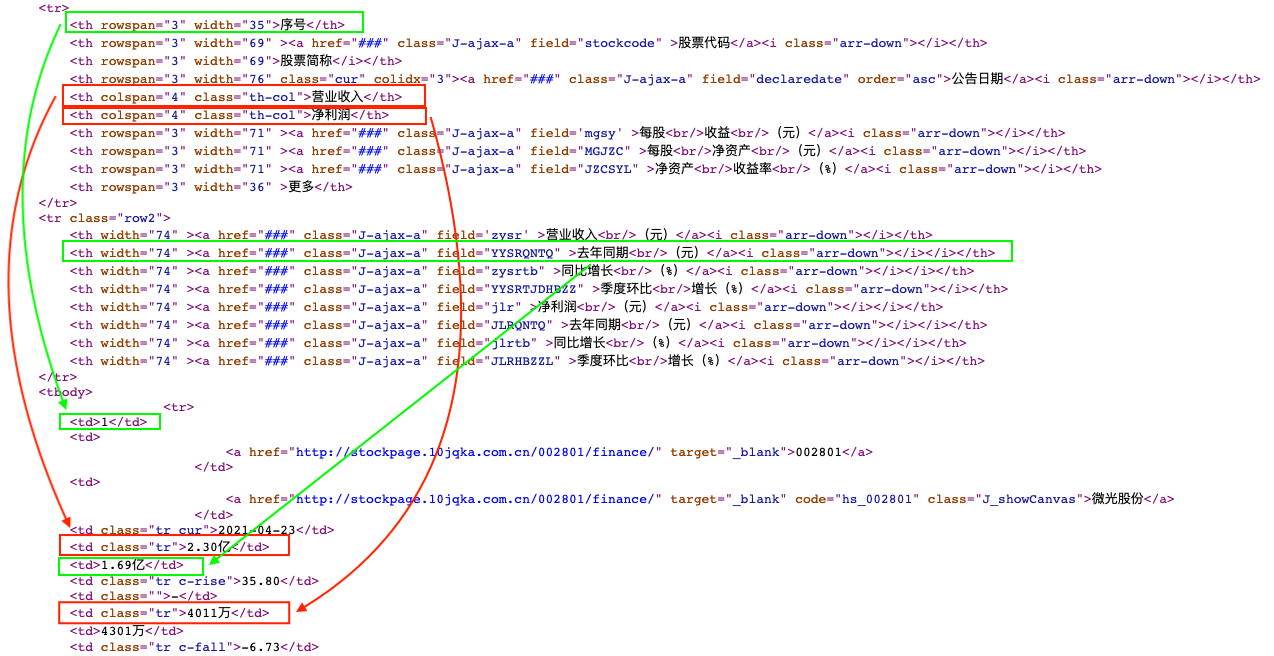

In [289]:
# scrape each variable from webpage
#index_f = re.findall('<td>(.*)</td>',result_finance)
#stockCode_f = re.findall('target="_blank">(.*)</a>',result_finance)
#stockName_f = re.findall('class="J_showCanvas">(.*)</a>',result_finance)
#revenue_2020_f = re.findall('<th colspan="4" class="th-col">营业收入</th><td class="tr">(.*)</td>',result_finance)
#revenue_2019_f = re.findall('<td>(.*)</td>',result_finance)

# build up dataframe
#df_finance = pd.DataFrame({
    #'stockCode_f':stockCode_f,
    #'stockName_f':stockName_f,
    #'revenue_2020_f':revenue2020_f,
    #'revenue_2019_f':revenue2019_f,
#},index=index_f)

In [290]:
re.findall('<th colspan="4" class="th-col">营业收入</th><td class="tr">(.*)</td>',result_finance)

<IPython.core.display.Javascript object>

[]

#### Extract link page

In [291]:
# taking from Inspect-Network-Headers-Request Headers

headers_link = {

'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
'Accept-Encoding': 'gzip, deflate',
'Accept-Language': 'en-US,en;q=0.9,zh-CN;q=0.8,zh;q=0.7,ca;q=0.6',
'Cache-Control': 'max-age=0',
#'Connection': 'keep-alive',
'Cookie': 'Hm_lvt_78c58f01938e4d85eaf619eae71b4ed1=1619373477; cmsad_170_0=0; searchGuide=sg; Hm_lvt_22a3c65fd214b0d5fd3a923be29458c7=1619377347,1619380093; Hm_lpvt_22a3c65fd214b0d5fd3a923be29458c7=1619380093; Hm_lvt_f79b64788a4e377c608617fba4c736e2=1619377345,1619380094; Hm_lpvt_f79b64788a4e377c608617fba4c736e2=1619380094; Hm_lpvt_78c58f01938e4d85eaf619eae71b4ed1=1619380094; v=A6RaVNpZmJL5bezeqSx5YJROc6mVPcinimFc677FMG8yaUhf5k2YN9pxLHkN',
#'DNT': 1
#'Host': 'data.10jqka.com.cn'
'Referer': 'http://data.10jqka.com.cn/financial/yjkb/',
'Upgrade-Insecure-Requests': '1',
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36',
    
}

In [292]:
# Scrape link page from the first page

result_link = ' ' #unsupported operand type(s) for +=: 'Response' and 'str'
url_link = 'http://stockpage.10jqka.com.cn/{}/finance/'
for code in stockCode : #stockCode 
    result_link += requests.get(url_link.format(code),headers=headers_link).text


<b>图二:</b>
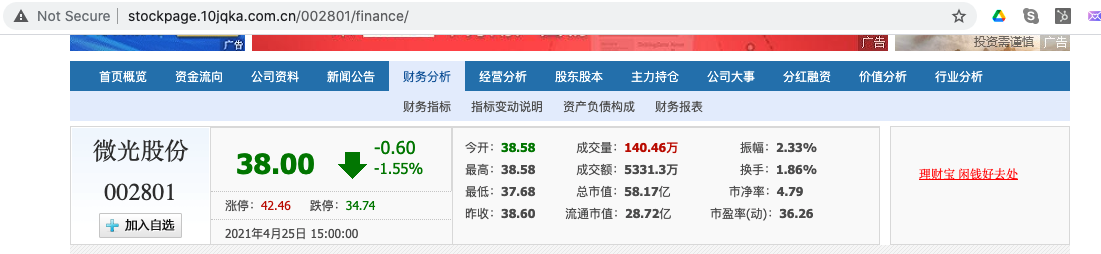

In [294]:
re.findall('<span class="price" id="hexm_curPrice">(.*)</span>',result_link)

<IPython.core.display.Javascript object>

[]

In [295]:
# scrape each variable from link page

stockCode_link = re.findall('id="pageStockCode">(.*)</div>',result_link)
stockName_link = re.findall('id="pageStockName">(.*)</div>',result_link)
#stockPrice_link = re.findall('<span class="price" id="hexm_curPrice">(.*)</span>',result_link)
#totalValue_link = re.findall('target="_blank">(.*)</a>',result_link)
#netProfit_link = re.findall('',result_link)
#PE_link = totalValue / netProfit
#TTM_link = re.findall('',result_link)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<b>图三：</b>
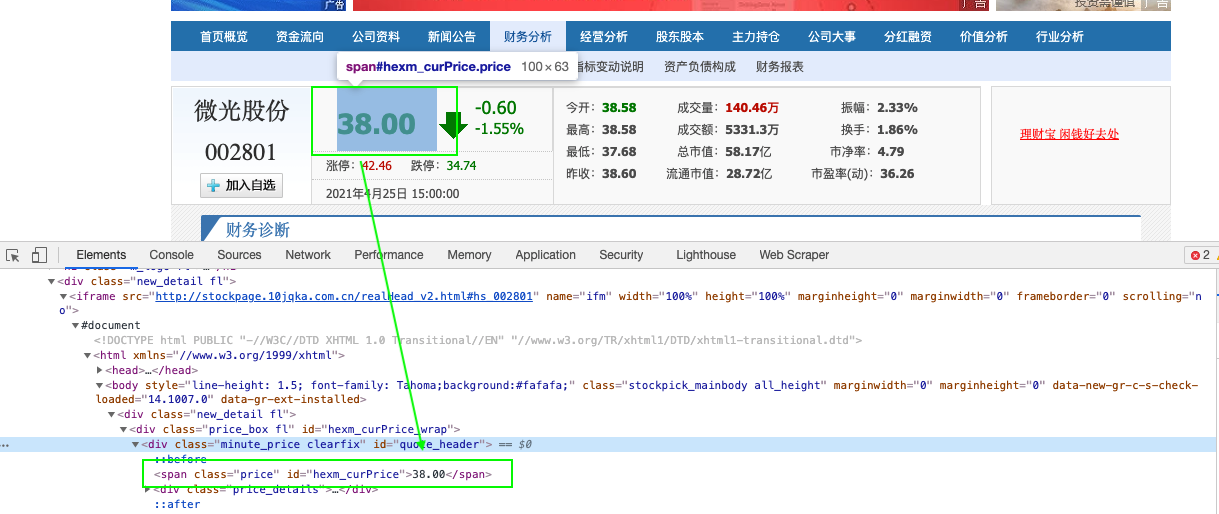